In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras

import gc

from numpy import save, load


In [2]:
#fds.list_builders()

In [3]:
ds = 'malaria'
builder = tfds.builder(ds)
info = builder.info
info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images
    with equal instances of parasitized and uninfected cells from the thin blood 
    smear slide images of segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_path='C:\\Users\\edmun\\tensorflow_datasets\\malaria\\1.0.0',
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward 
      improved malaria parasite detection in thin blood smear image

## Loading the data

In [14]:

ds_all, ds_all_info = tfds.load(name='malaria', split="train", shuffle_files=True, with_info=True)

train_ds, val_ds, test_ds = tfds.load(ds, split=['train[:20%]', 'train[70%:75%]', 'train[85%:90%]'])


In [15]:
print("Number of prediction classes:", ds_all_info.features['label'].num_classes)
print("Prediction classes:", ds_all_info.features['label'].names)

Number of prediction classes: 2
Prediction classes: ['parasitized', 'uninfected']


In [16]:
no_train = tf.data.experimental.cardinality(train_ds).numpy()
no_valid = tf.data.experimental.cardinality(val_ds).numpy()
no_test = tf.data.experimental.cardinality(test_ds).numpy()

In [17]:
print("Number of training images:", no_train)
print("Number of validating images:", no_valid)
print("Number of testing images:", no_test)

Number of training images: 5512
Number of validating images: 1377
Number of testing images: 1378


## Showing Examples

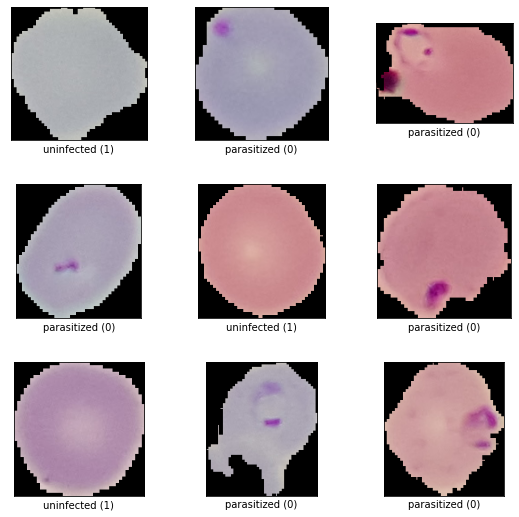

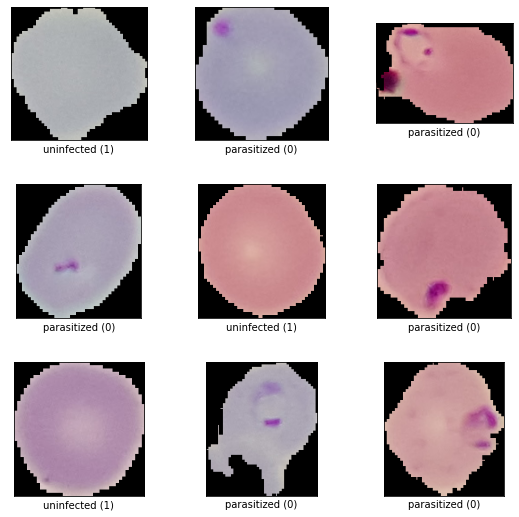

In [18]:
tfds.show_examples(ds_all, info)

## Data Preparation   

Extracting the images

In [19]:
train_images = np.array([example['image'].numpy() for example in train_ds] , dtype="object")
train_labels = [example['label'] for example in train_ds]

val_images = np.array([example['image'].numpy() for example in val_ds] , dtype="object")
val_labels = [example['label'] for example in val_ds]

test_images = np.array([example['image'].numpy() for example in test_ds] , dtype="object")
test_labels = [example['label'] for example in test_ds]

Checking to see the consistency in image lengths. 


In [20]:
c = 0
for i in train_images:
    print(i.shape)
    c+=1
    if c > 100:
        break

(103, 103, 3)
(106, 121, 3)
(139, 142, 3)
(130, 118, 3)
(121, 109, 3)
(127, 121, 3)
(166, 151, 3)
(145, 139, 3)
(139, 142, 3)
(172, 145, 3)
(157, 166, 3)
(115, 88, 3)
(115, 136, 3)
(142, 136, 3)
(115, 133, 3)
(124, 127, 3)
(136, 121, 3)
(118, 118, 3)
(124, 106, 3)
(142, 181, 3)
(139, 133, 3)
(127, 130, 3)
(157, 136, 3)
(136, 151, 3)
(106, 118, 3)
(130, 127, 3)
(160, 163, 3)
(151, 154, 3)
(100, 118, 3)
(133, 148, 3)
(118, 115, 3)
(112, 124, 3)
(175, 154, 3)
(115, 121, 3)
(142, 133, 3)
(121, 133, 3)
(139, 133, 3)
(124, 166, 3)
(148, 154, 3)
(118, 109, 3)
(133, 127, 3)
(160, 139, 3)
(133, 136, 3)
(121, 160, 3)
(127, 112, 3)
(127, 112, 3)
(118, 124, 3)
(157, 142, 3)
(136, 142, 3)
(148, 130, 3)
(136, 91, 3)
(142, 139, 3)
(118, 121, 3)
(136, 160, 3)
(121, 106, 3)
(115, 124, 3)
(175, 193, 3)
(139, 136, 3)
(163, 154, 3)
(112, 124, 3)
(142, 145, 3)
(154, 112, 3)
(142, 142, 3)
(112, 115, 3)
(121, 112, 3)
(124, 148, 3)
(154, 124, 3)
(202, 244, 3)
(142, 130, 3)
(121, 139, 3)
(127, 127, 3)
(148, 14

The images are of different lengths. We need to pad/crop the images to achieve images of same lengths.

In [21]:
gc.collect()

3525

In [22]:
try:
    train_images = load('train_images.npy',  allow_pickle=True)
    print("Numpy file found and loaded.")
except FileNotFoundError:
    print("Training Images Numpy file not yet created. Creating one now.")
    for i in range(len(train_images)):
        train_images[i] = tf.image.resize_with_crop_or_pad(train_images[i], 200, 200)
        train_images[i] = tf.image.convert_image_dtype(train_images[i], tf.float64)
        train_images[i] = tf.reshape(train_images[i], [200,200,3])
    train_images = tf.constant(tf.stack([i.numpy() for i in train_images])).numpy()
    save('train_images.npy', train_images)

Training Images Numpy file not yet created. Creating one now.


In [1]:
# try:
#     train_images = load('train_images.npy',  allow_pickle=True):
# except FileNotFoundError:
#     train_images = tf.constant(tf.stack([i.numpy() for i in train_images])).numpy()
#     save('train_images.npy', train_images)

In [29]:
train_labels = tf.constant(tf.stack([i.numpy() for i in train_labels])).numpy()

AttributeError: 'numpy.int32' object has no attribute 'numpy'

In [25]:
gc.collect()

267

In [26]:
try:
    val_images = load('val_images.npy',  allow_pickle=True)
    print("Numpy file found and loaded.")
except FileNotFoundError:
    print("Validating Images Numpy file not yet created. Creating one now.")
    for i in range(len(val_images)):
        val_images[i] = tf.image.resize_with_crop_or_pad(val_images[i], 200, 200)
        val_images[i] = tf.image.convert_image_dtype(val_images[i], tf.float64)
        val_images[i] = tf.reshape(val_images[i], [200,200,3])
    val_images = tf.constant(tf.stack([i.numpy() for i in val_images])).numpy()
    save('val_images.npy', val_images)

Training Images Numpy file not yet created. Creating one now.


In [28]:
val_labels = tf.constant(tf.stack([i.numpy() for i in val_labels])).numpy()

AttributeError: 'numpy.int32' object has no attribute 'numpy'

In [30]:
try:
    test_images = load('test_images.npy',  allow_pickle=True)
    print("Numpy file found and loaded.")
except FileNotFoundError:
    print("Testing Images Numpy file not yet created. Creating one now.")
    for i in range(len(test_images)):
        test_images[i] = tf.image.resize_with_crop_or_pad(test_images[i], 200, 200)
        test_images[i] = tf.image.convert_image_dtype(test_images[i], tf.float64)
        test_images[i] = tf.reshape(test_images[i], [200,200,3])
    test_images = tf.constant(tf.stack([i.numpy() for i in test_images])).numpy()
    save('test_images.npy', test_images)

Testing Images Numpy file not yet created. Creating one now.


In [31]:
test_labels = tf.constant(tf.stack([i.numpy() for i in test_labels])).numpy()

In [418]:
# for i in range(len(val_images)):
#     val_images[i] = tf.image.resize_with_crop_or_pad(val_images[i], 200, 200)
#     val_images[i] = tf.image.convert_image_dtype(val_images[i], tf.float64)
#     val_images[i] = tf.reshape(val_images[i], [200,200,3])
# val_images = tf.constant(tf.stack([i.numpy() for i in val_images])).numpy()
# val_labels = tf.constant(tf.stack([i.numpy() for i in val_labels])).numpy()

In [420]:
# for i in range(len(test_images)):
#     test_images[i] = tf.image.resize_with_crop_or_pad(test_images[i], 200, 200)
#     test_images[i] = tf.image.convert_image_dtype(test_images[i], tf.float64)
#     test_images[i] = tf.reshape(test_images[i], [200,200,3])
# test_images = tf.constant(tf.stack([i.numpy() for i in test_images])).numpy()
# test_labels = tf.constant(tf.stack([i.numpy() for i in test_labels])).numpy()

In [32]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("uninfected")
        else:
            plt.title("parasitized")
        plt.axis("off")

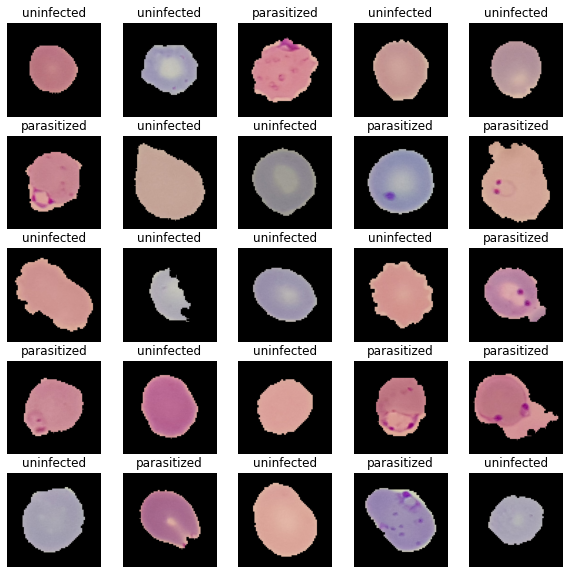

In [34]:
show_batch(train_images, train_labels)

## Model Building

In [35]:
gc.collect()

58029

In [37]:
model = keras.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(2, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images,train_labels, epochs=5, batch_size=32)

Epoch 1/5
173/173 [==============================] - 44s 241ms/step - loss: 3.0464 - accuracy: 0.5343
Epoch 2/5
173/173 [==============================] - 41s 236ms/step - loss: 0.7186 - accuracy: 0.6056
Epoch 3/5
173/173 [==============================] - 42s 240ms/step - loss: 0.6679 - accuracy: 0.6257
Epoch 4/5
173/173 [==============================] - 43s 248ms/step - loss: 0.7069 - accuracy: 0.6092
Epoch 5/5
173/173 [==============================] - 40s 233ms/step - loss: 0.6828 - accuracy: 0.6163
